Tools Required:
requests: To fetch data from an API.
matplotlib: To visualize the stock price.
time: To create delays between fetching data.
pandas: For handling and analyzing stock data.

Step 1: Install Required Libraries
Install the required packages using pip:

In [1]:
pip install matplotlib requests pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Step 2: Get Real-Time Data from an API
We'll use a free stock price API such as Alpha Vantage. You can get an API key by registering at Alpha Vantage. After obtaining the key, we can use the API to pull real-time stock data.

Step 3: Write the Code

Fetching real-time data for AAPL...


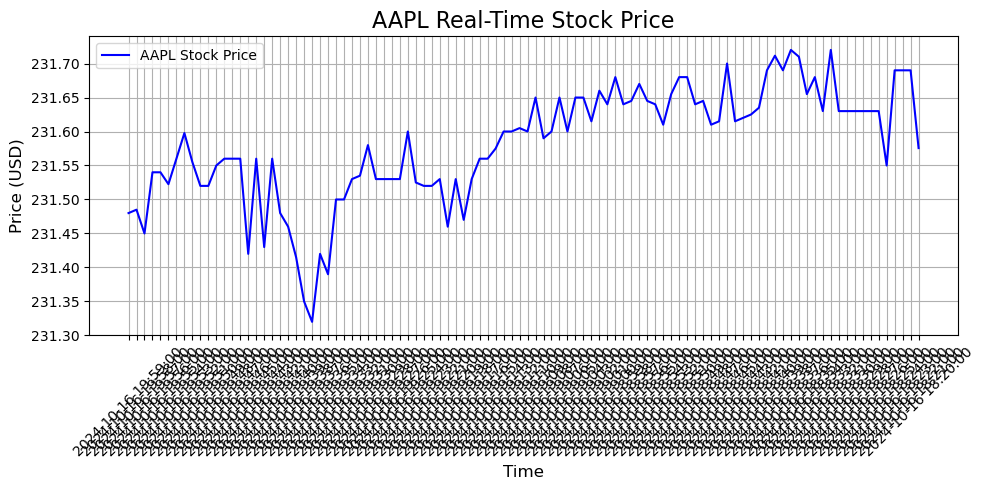

<Figure size 640x480 with 0 Axes>

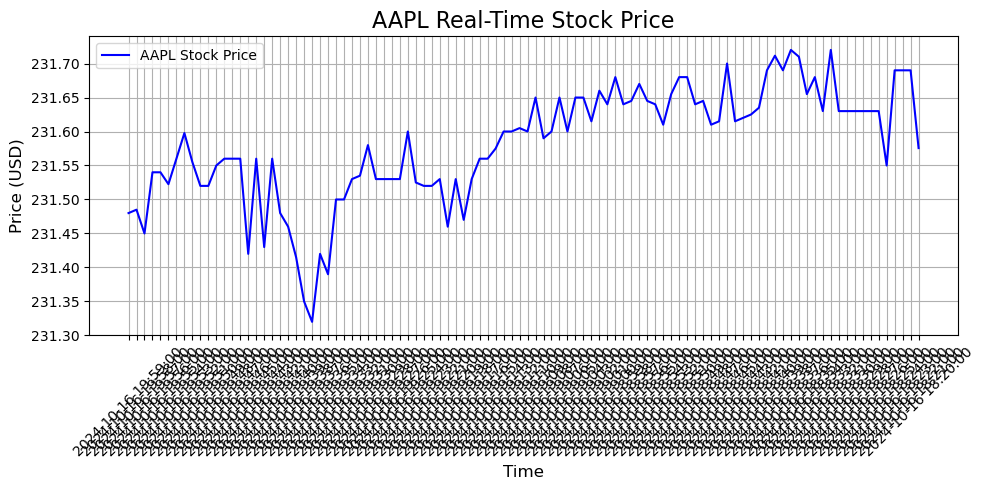

<Figure size 640x480 with 0 Axes>

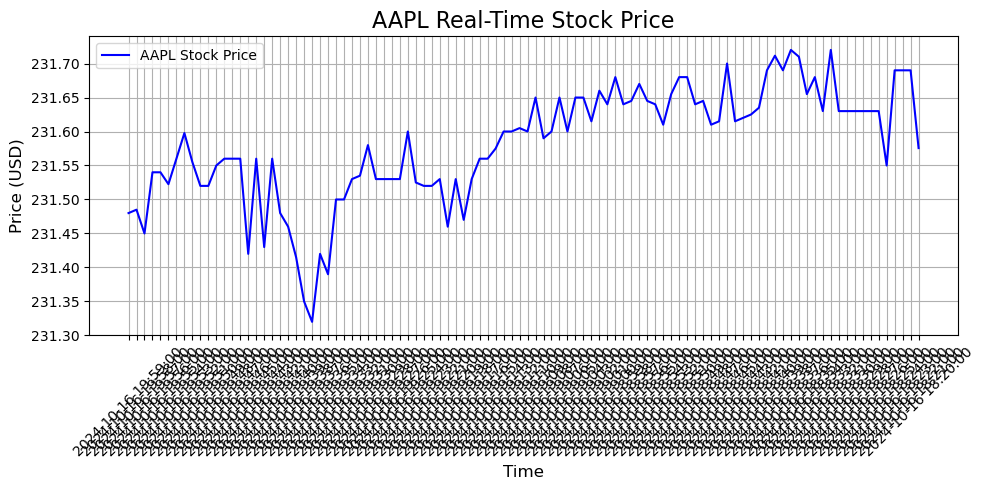

<Figure size 640x480 with 0 Axes>

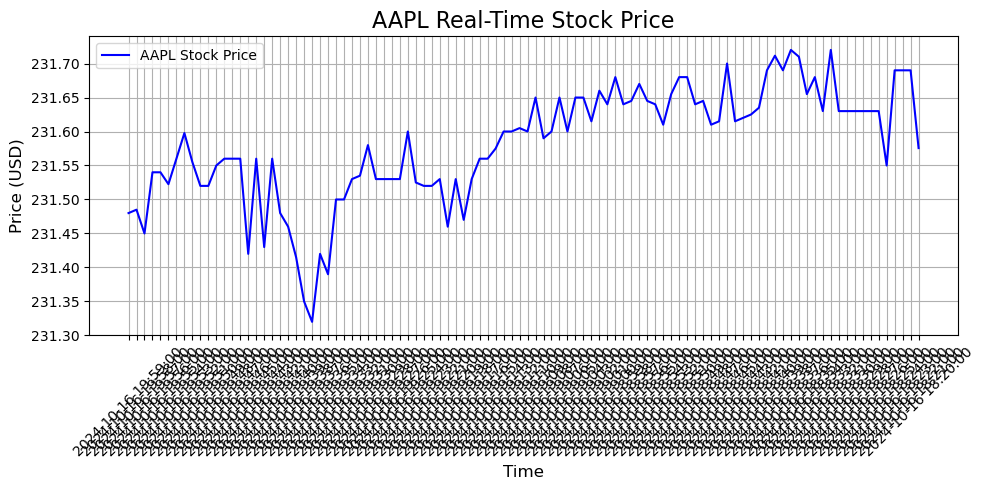

<Figure size 640x480 with 0 Axes>

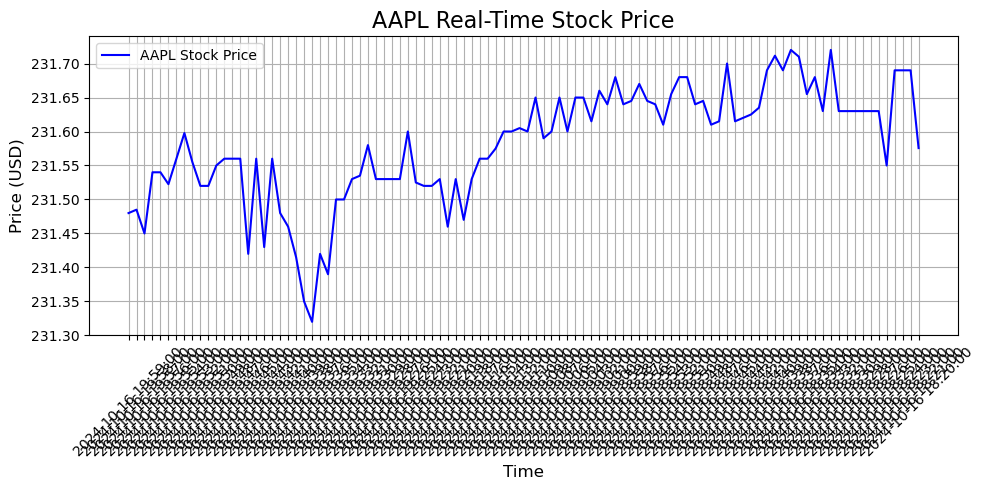

<Figure size 640x480 with 0 Axes>

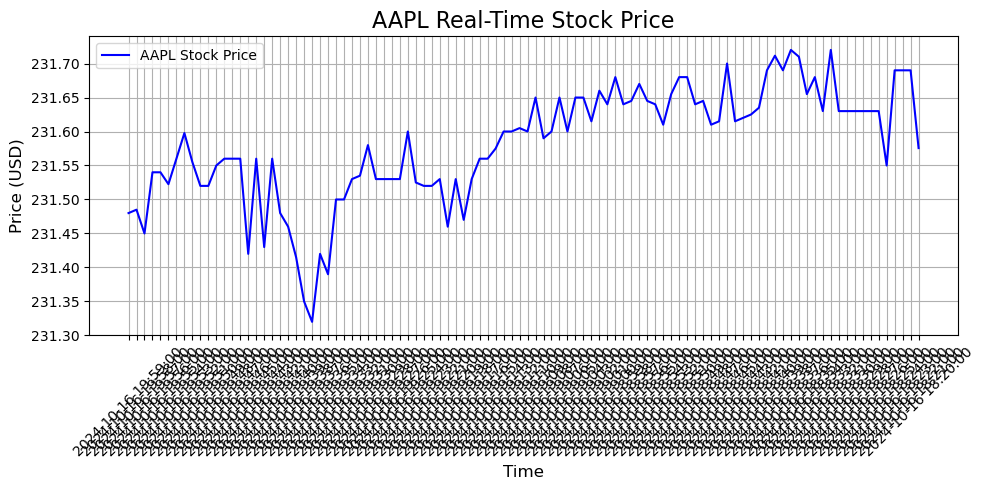

<Figure size 640x480 with 0 Axes>

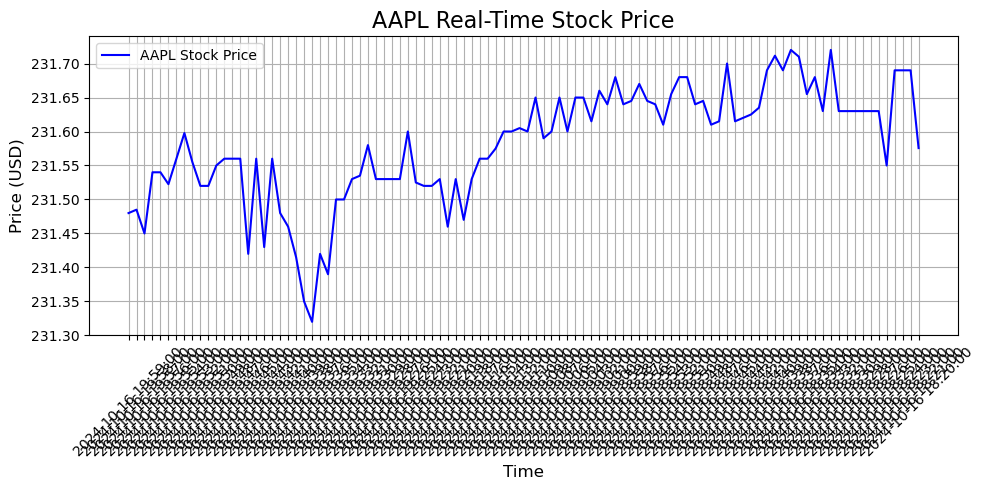

<Figure size 640x480 with 0 Axes>

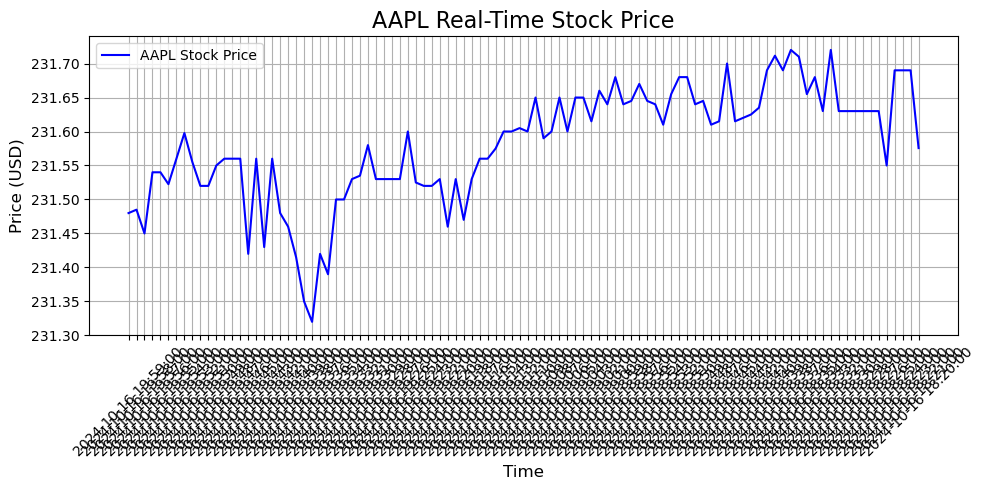

<Figure size 640x480 with 0 Axes>

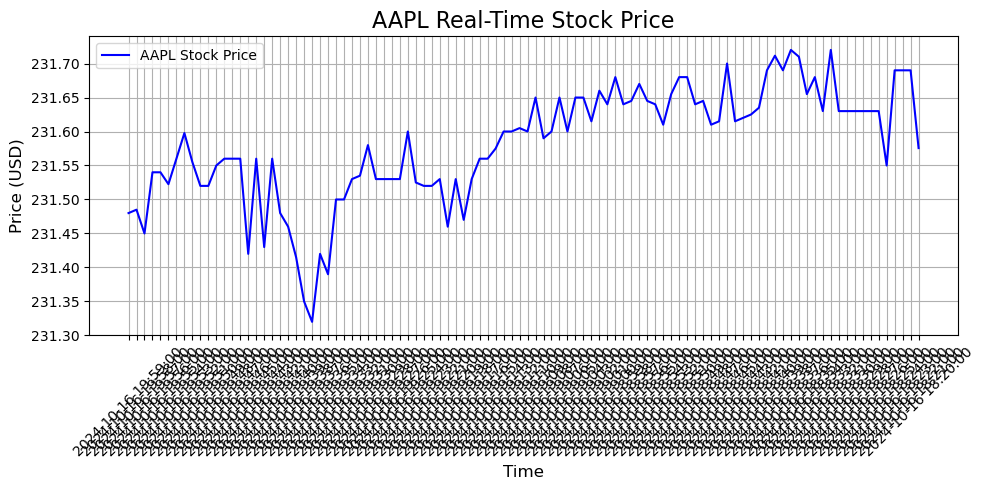

In [ ]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import time

# Set up the Alpha Vantage API key and the stock symbol
API_KEY = 'YOUR_API_KEY'  # Replace with your Alpha Vantage API key
STOCK_SYMBOL = 'AAPL'     # You can change this to any stock symbol
INTERVAL = '1min'         # 1-minute interval for real-time data

# Base URL for the Alpha Vantage API
BASE_URL = 'https://www.alphavantage.co/query'

# Function to fetch stock data from Alpha Vantage
def get_stock_data(symbol):
    url = f"{BASE_URL}?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={INTERVAL}&apikey={API_KEY}&datatype=json"
    response = requests.get(url)
    data = response.json()
    # Extract the 'Time Series (1min)' data
    time_series = data.get(f'Time Series ({INTERVAL})', {})
    df = pd.DataFrame(time_series).T
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df = df.astype(float)
    return df

# Real-time stock price plotting function
def plot_stock_price(df):
    plt.figure(figsize=(10,5))
    plt.plot(df['Close'], color='blue', label=f"{STOCK_SYMBOL} Stock Price")
    plt.title(f"{STOCK_SYMBOL} Real-Time Stock Price", fontsize=16)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.pause(1)  # Brief pause to simulate real-time updates
    plt.clf()     # Clear the plot for the next update

# Main loop to fetch and update stock price
def real_time_stock_tracker():
    print(f"Fetching real-time data for {STOCK_SYMBOL}...")
    plt.ion()  # Turn on interactive plotting mode
    while True:
        stock_data = get_stock_data(STOCK_SYMBOL)
        plot_stock_price(stock_data)
        time.sleep(60)  # Update every minute

if __name__ == "__main__":
    real_time_stock_tracker()


Step 4: How it Works
Fetching Data: The get_stock_data function sends a request to the Alpha Vantage API to retrieve 1-minute interval stock price data for the selected stock.
Data Processing: The response is processed using pandas, converting the JSON data into a DataFrame, and the stock's close price is extracted for visualization.
Real-Time Plotting: The plot_stock_price function uses matplotlib to update the plot every minute with new stock prices in real time.
Step 5: Run the Code
To run the script, simply execute it in your Python environment. It will continuously fetch new data every minute and update the plot accordingly.



This project can be extended with additional features, such as:

Adding more stocks to track.
Storing historical data to analyze trends.
Implementing alerts for price changes.